In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# **Basic Data Science and ML Pipeline**

In [ ]:
#cloning the repository
!git clone https://github.com/snairvasudev/Case-Study-CE880.git

fatal: destination path 'Case-Study-CE880' already exists and is not an empty directory.


In [ ]:
#putting the data into a dataframe
data = pd.read_csv('/content/Case-Study-CE880/HotelCancelation.csv')

In [ ]:
#printing the first five rows of the dataset
print(data.head())

#printing the shape of the dataset
print(data.shape)

  Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_

In [ ]:
#show column names of data
data.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [ ]:
#printing the unique values of all columns containing data of type object

print("Unique values of column 'type_of_meal_plan': ", data.type_of_meal_plan.unique())
print("Unique values of column 'room_type_reserved': ", data.room_type_reserved.unique())
print("Unique values of column 'market_segment_type': ", data.market_segment_type.unique())
print("Unique values of column 'booking_status': ", data.booking_status.unique())

Unique values of column 'type_of_meal_plan':  ['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
Unique values of column 'room_type_reserved':  ['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
Unique values of column 'market_segment_type':  ['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']
Unique values of column 'booking_status':  ['Not_Canceled' 'Canceled']


In [ ]:
data_df = data.copy()

# **Basic EDA and Statistical Analysis**

In [ ]:
#checking for null values
data_df.isnull().values.any()

False

In [ ]:
#analysing the data
data_df.describe().T

count         mean        std     min  \
no_of_adults                          36275.0     1.844962   0.518715     0.0   
no_of_children                        36275.0     0.105279   0.402648     0.0   
no_of_weekend_nights                  36275.0     0.810724   0.870644     0.0   
no_of_week_nights                     36275.0     2.204300   1.410905     0.0   
required_car_parking_space            36275.0     0.030986   0.173281     0.0   
lead_time                             36275.0    85.232557  85.930817     0.0   
arrival_year                          36275.0  2017.820427   0.383836  2017.0   
arrival_month                         36275.0     7.423653   3.069894     1.0   
arrival_date                          36275.0    15.596995   8.740447     1.0   
repeated_guest                        36275.0     0.025637   0.158053     0.0   
no_of_previous_cancellations          36275.0     0.023349   0.368331     0.0   
no_of_previous_bookings_not_canceled  36275.0     0.153411   1.754171     0.0   
avg_price_per_room                    36275.0   103.423539  35.089424     0.0   
no_of_special_requests                36275.0     0.619655   0.786236     0.0   

                                         25%      50%     75%     max  
no_of_adults                             2.0     2.00     2.0     4.0  
no_of_children                           0.0     0.00     0.0    10.0  
no_of_weekend_nights                     0.0     1.00     2.0     7.0  
no_of_week_nights                        1.0     2.00     3.0    17.0  
required_car_parking_space               0.0     0.00     0.0     1.0  
lead_time                               17.0    57.00   126.0   443.0  
arrival_year                          2018.0  2018.00  2018.0  2018.0  
arrival_month                            5.0     8.00    10.0    12.0  
arrival_date                             8.0    16.00    23.0    31.0  
repeated_guest                           0.0     0.00     0.0     1.0  
no_of_previous_cancellations             0.0     0.00     0.0    13.0  
no_of_previous_bookings_not_canceled     0.0     0.00     0.0    58.0  
avg_price_per_room                      80.3    99.45   120.0   540.0  
no_of_special_requests                   0.0     0.00     1.0     5.0

In [ ]:
#checking the datatypes of the data present in each column
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

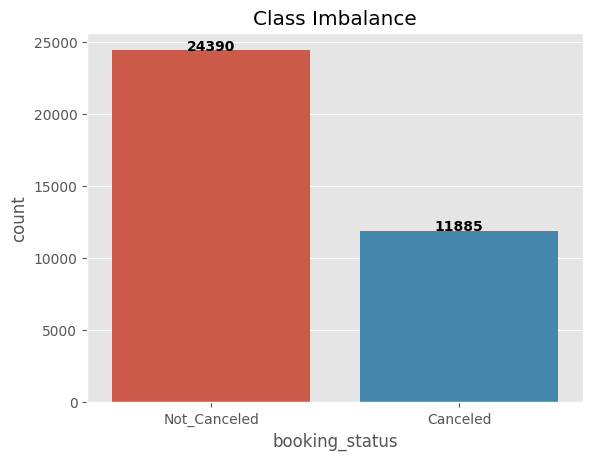

In [ ]:
#Looking for imbalance in class for 'booking_status'
#ploting the bar graph
sns.countplot(x='booking_status', data=data_df)
plt.title('Class Imbalance')
for i, v in enumerate(data_df['booking_status'].value_counts()):
    plt.text(i, v, str(v), fontweight='bold', ha="center")
plt.show()
plt.show()


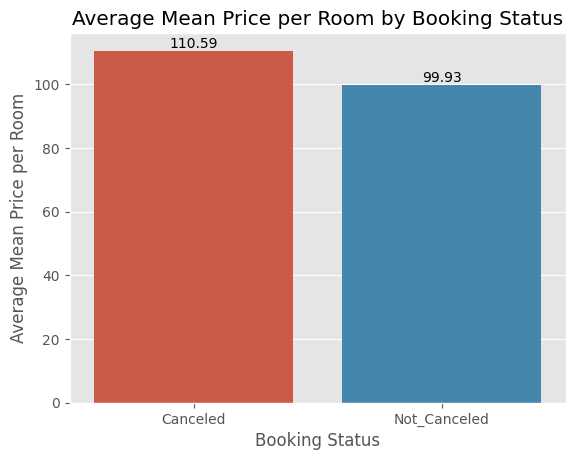

In [ ]:
#showing the most mean of the average price per room according to booking type
#grouping the booking_status with the respective avg_price_per_room 
avg_booking_status = data_df.groupby('booking_status')['avg_price_per_room'].mean().reset_index()

#ploting the bar graph
ax = sns.barplot(data = avg_booking_status, x = 'booking_status', y = 'avg_price_per_room')
ax.set(title='Average Mean Price per Room by Booking Status', xlabel='Booking Status', ylabel='Average Mean Price per Room')
for index, row in avg_booking_status.iterrows():
    ax.text(row.name, row.avg_price_per_room+1, round(row.avg_price_per_room,2), color='black', ha="center")

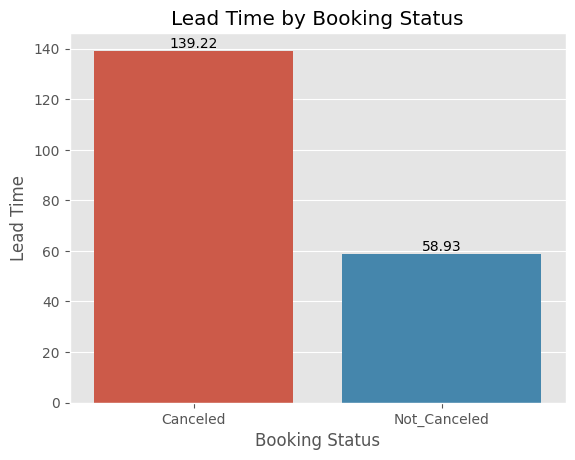

In [ ]:
#showing the mean of the lead time according to booking type
#grouping the booking_status with the average lead time 
avg_booking_status = data_df.groupby('booking_status')['lead_time'].mean().reset_index()

#ploting the bar graph
ax = sns.barplot(data = avg_booking_status, x = 'booking_status', y = 'lead_time')
ax.set(title='Lead Time by Booking Status', xlabel='Booking Status', ylabel='Lead Time')
for index, row in avg_booking_status.iterrows():
    ax.text(row.name, row.lead_time+1, round(row.lead_time,2), color='black', ha="center")

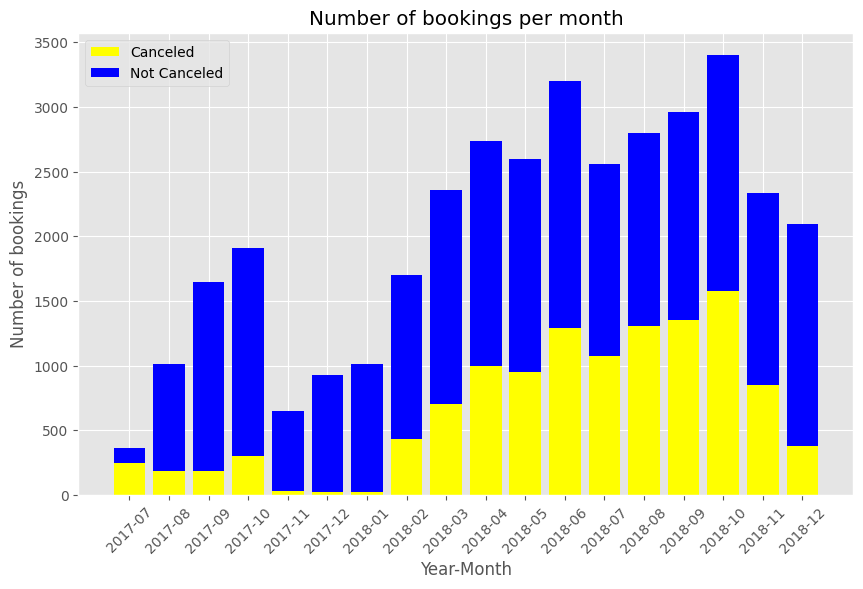

In [ ]:
#copying the data_df to data_year
data_year = data_df.copy()

#combining the arrival_year and arrival_month for analysis
data_year['arrival_year_month'] = data_year['arrival_year'].astype(str) + '-' + data_year['arrival_month'].astype(str).str.zfill(2)

#Groupby operation to count number of bookings per month for canceled and not canceled bookings
canceled_counts = data_year[data_year['booking_status'] == 'Canceled'].groupby('arrival_year_month').size()
not_canceled_counts = data_year[data_year['booking_status'] == 'Not_Canceled'].groupby('arrival_year_month').size()

# Plotting the results
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(canceled_counts.index, canceled_counts.values, label='Canceled', color='yellow')
ax.bar(not_canceled_counts.index, not_canceled_counts.values, bottom=canceled_counts.values, label='Not Canceled', color='blue')
ax.set_xticklabels(canceled_counts.index, rotation=45)
ax.set_ylabel('Number of bookings')
ax.set_xlabel('Year-Month')
ax.set_title('Number of bookings per month')
ax.legend()
plt.show()

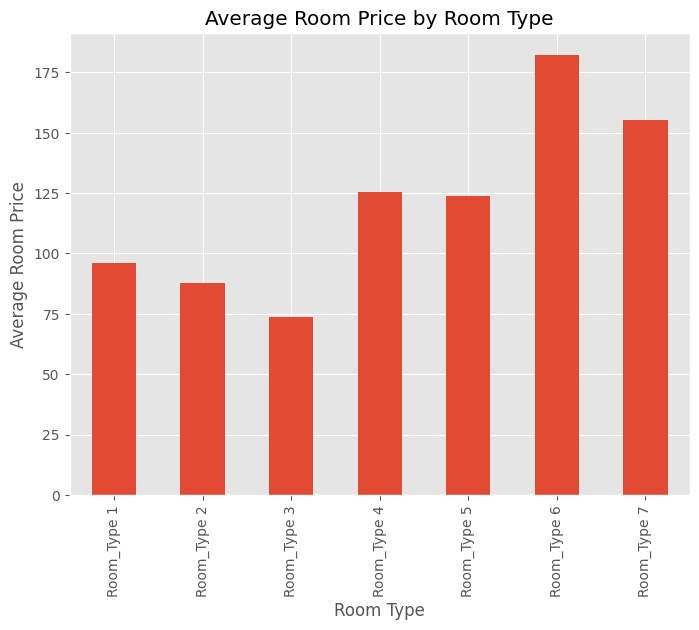

In [ ]:
#average price of each room by grouping room_type_reserved and avg_price_per_room
room_prices = data_df.groupby('room_type_reserved')['avg_price_per_room'].mean()

#plotting a bar plot 
room_prices.plot(kind = 'bar', figsize = (8, 6))
plt.xlabel('Room Type')
plt.ylabel('Average Room Price')
plt.title('Average Room Price by Room Type')
plt.show()

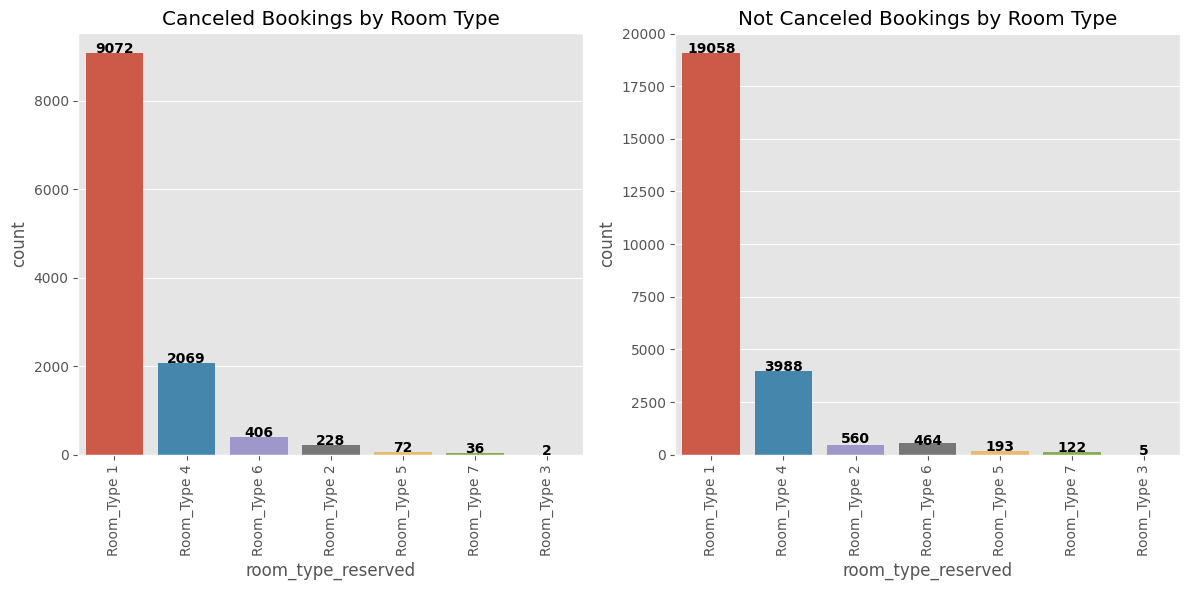

In [ ]:
# creating a subplot grid with 1 row and 2 columns
fig, ax = plt.subplots(1, 2, figsize=(12, 6))


# plotting for canceled bookings
sns.countplot(x='room_type_reserved', data=data_df[data_df["booking_status"] == "Canceled"], ax=ax[0])
ax[0].set_title('Canceled Bookings by Room Type')
for i, v in enumerate(data_df[data_df["booking_status"] == "Canceled"]['room_type_reserved'].value_counts()):
    ax[0].text(i, v, str(v), fontweight='bold', ha="center")

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)

# plotting for not_canceled bookings
sns.countplot(x='room_type_reserved', data=data_df[data_df["booking_status"] == "Not_Canceled"], ax=ax[1])
ax[1].set_title('Not Canceled Bookings by Room Type')
for i, v in enumerate(data_df[data_df["booking_status"] == "Not_Canceled"]['room_type_reserved'].value_counts()):
    ax[1].text(i, v, str(v), fontweight='bold', ha="center")

ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)

# displaying the plots
plt.tight_layout()
plt.show()

In [ ]:
#checking the unique fields of column type_of_meal_plan
data_df.type_of_meal_plan.unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

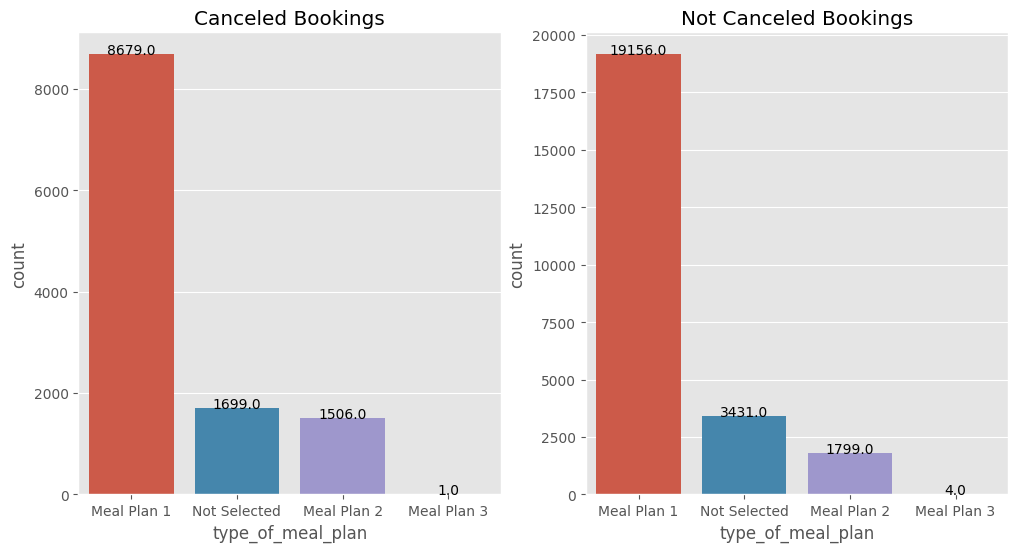

In [ ]:
#plotting to analyse the different type_of_meal_plans reserved per booking
# creating the subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# plotting for canceled bookings
sns.countplot(x='type_of_meal_plan', data=data_df[data_df['booking_status'] == 'Canceled'], ax=ax[0])
ax[0].set_title('Canceled Bookings')

# getting the heights of the bars
bars_canceled = ax[0].containers[0].patches
heights_canceled = [bar.get_height() for bar in bars_canceled]

# annotate the bars with their heights
for i, v in enumerate(heights_canceled):
    ax[0].text(i, v, str(v), ha='center')

# plot for not canceled bookings
sns.countplot(x='type_of_meal_plan', data=data_df[data_df['booking_status'] == 'Not_Canceled'], ax=ax[1])
ax[1].set_title('Not Canceled Bookings')

# get the heights of the bars
bars_not_canceled = ax[1].containers[0].patches
heights_not_canceled = [bar.get_height() for bar in bars_not_canceled]

# annotate the bars with their heights
for i, v in enumerate(heights_not_canceled):
    ax[1].text(i, v, str(v), ha='center')

plt.show()

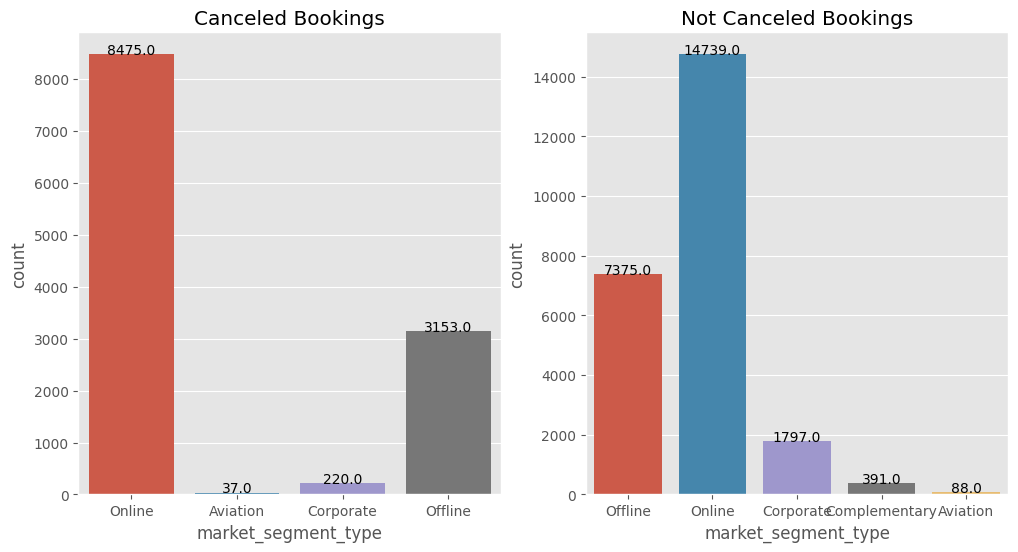

In [ ]:
#plotting for the different market_segment_types who have had bookings
# creating the subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# plotting for canceled bookings
sns.countplot(x='market_segment_type', data=data_df[data_df['booking_status'] == 'Canceled'], ax=ax[0])
ax[0].set_title('Canceled Bookings')

# getting the heights of the bars
bars_canceled = ax[0].containers[0].patches
heights_canceled = [bar.get_height() for bar in bars_canceled]

# annotate the bars with their heights
for i, v in enumerate(heights_canceled):
    ax[0].text(i, v, str(v), ha='center')

# plot for not canceled bookings
sns.countplot(x='market_segment_type', data=data_df[data_df['booking_status'] == 'Not_Canceled'], ax=ax[1])
ax[1].set_title('Not Canceled Bookings')

# get the heights of the bars
bars_not_canceled = ax[1].containers[0].patches
heights_not_canceled = [bar.get_height() for bar in bars_not_canceled]

# annotate the bars with their heights
for i, v in enumerate(heights_not_canceled):
    ax[1].text(i, v, str(v), ha='center')

plt.show()

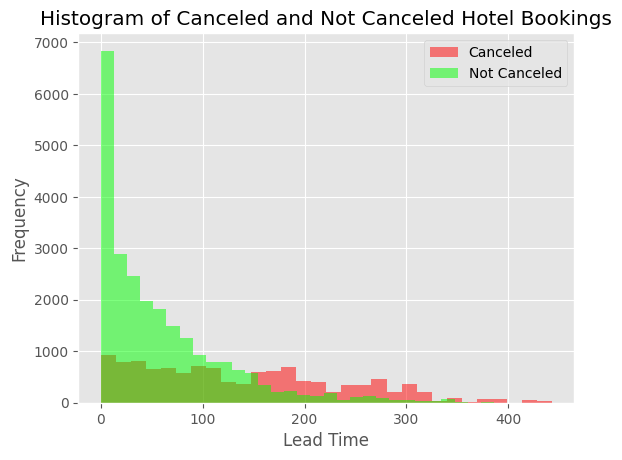

In [ ]:
#plotting the lead time according to canceled and not_canceled bookings
c = plt.hist(data_df[data_df["booking_status"] == "Canceled"].lead_time,bins=30,fc = (1,0,0,0.5),label = "Canceled")
n = plt.hist(data_df[data_df["booking_status"] == "Not_Canceled"].lead_time,bins=30,fc = (0,1,0,0.5),label = "Not Canceled")
plt.legend()
plt.xlabel("Lead Time")
plt.ylabel("Frequency")
plt.title("Histogram of Canceled and Not Canceled Hotel Bookings")
plt.show()


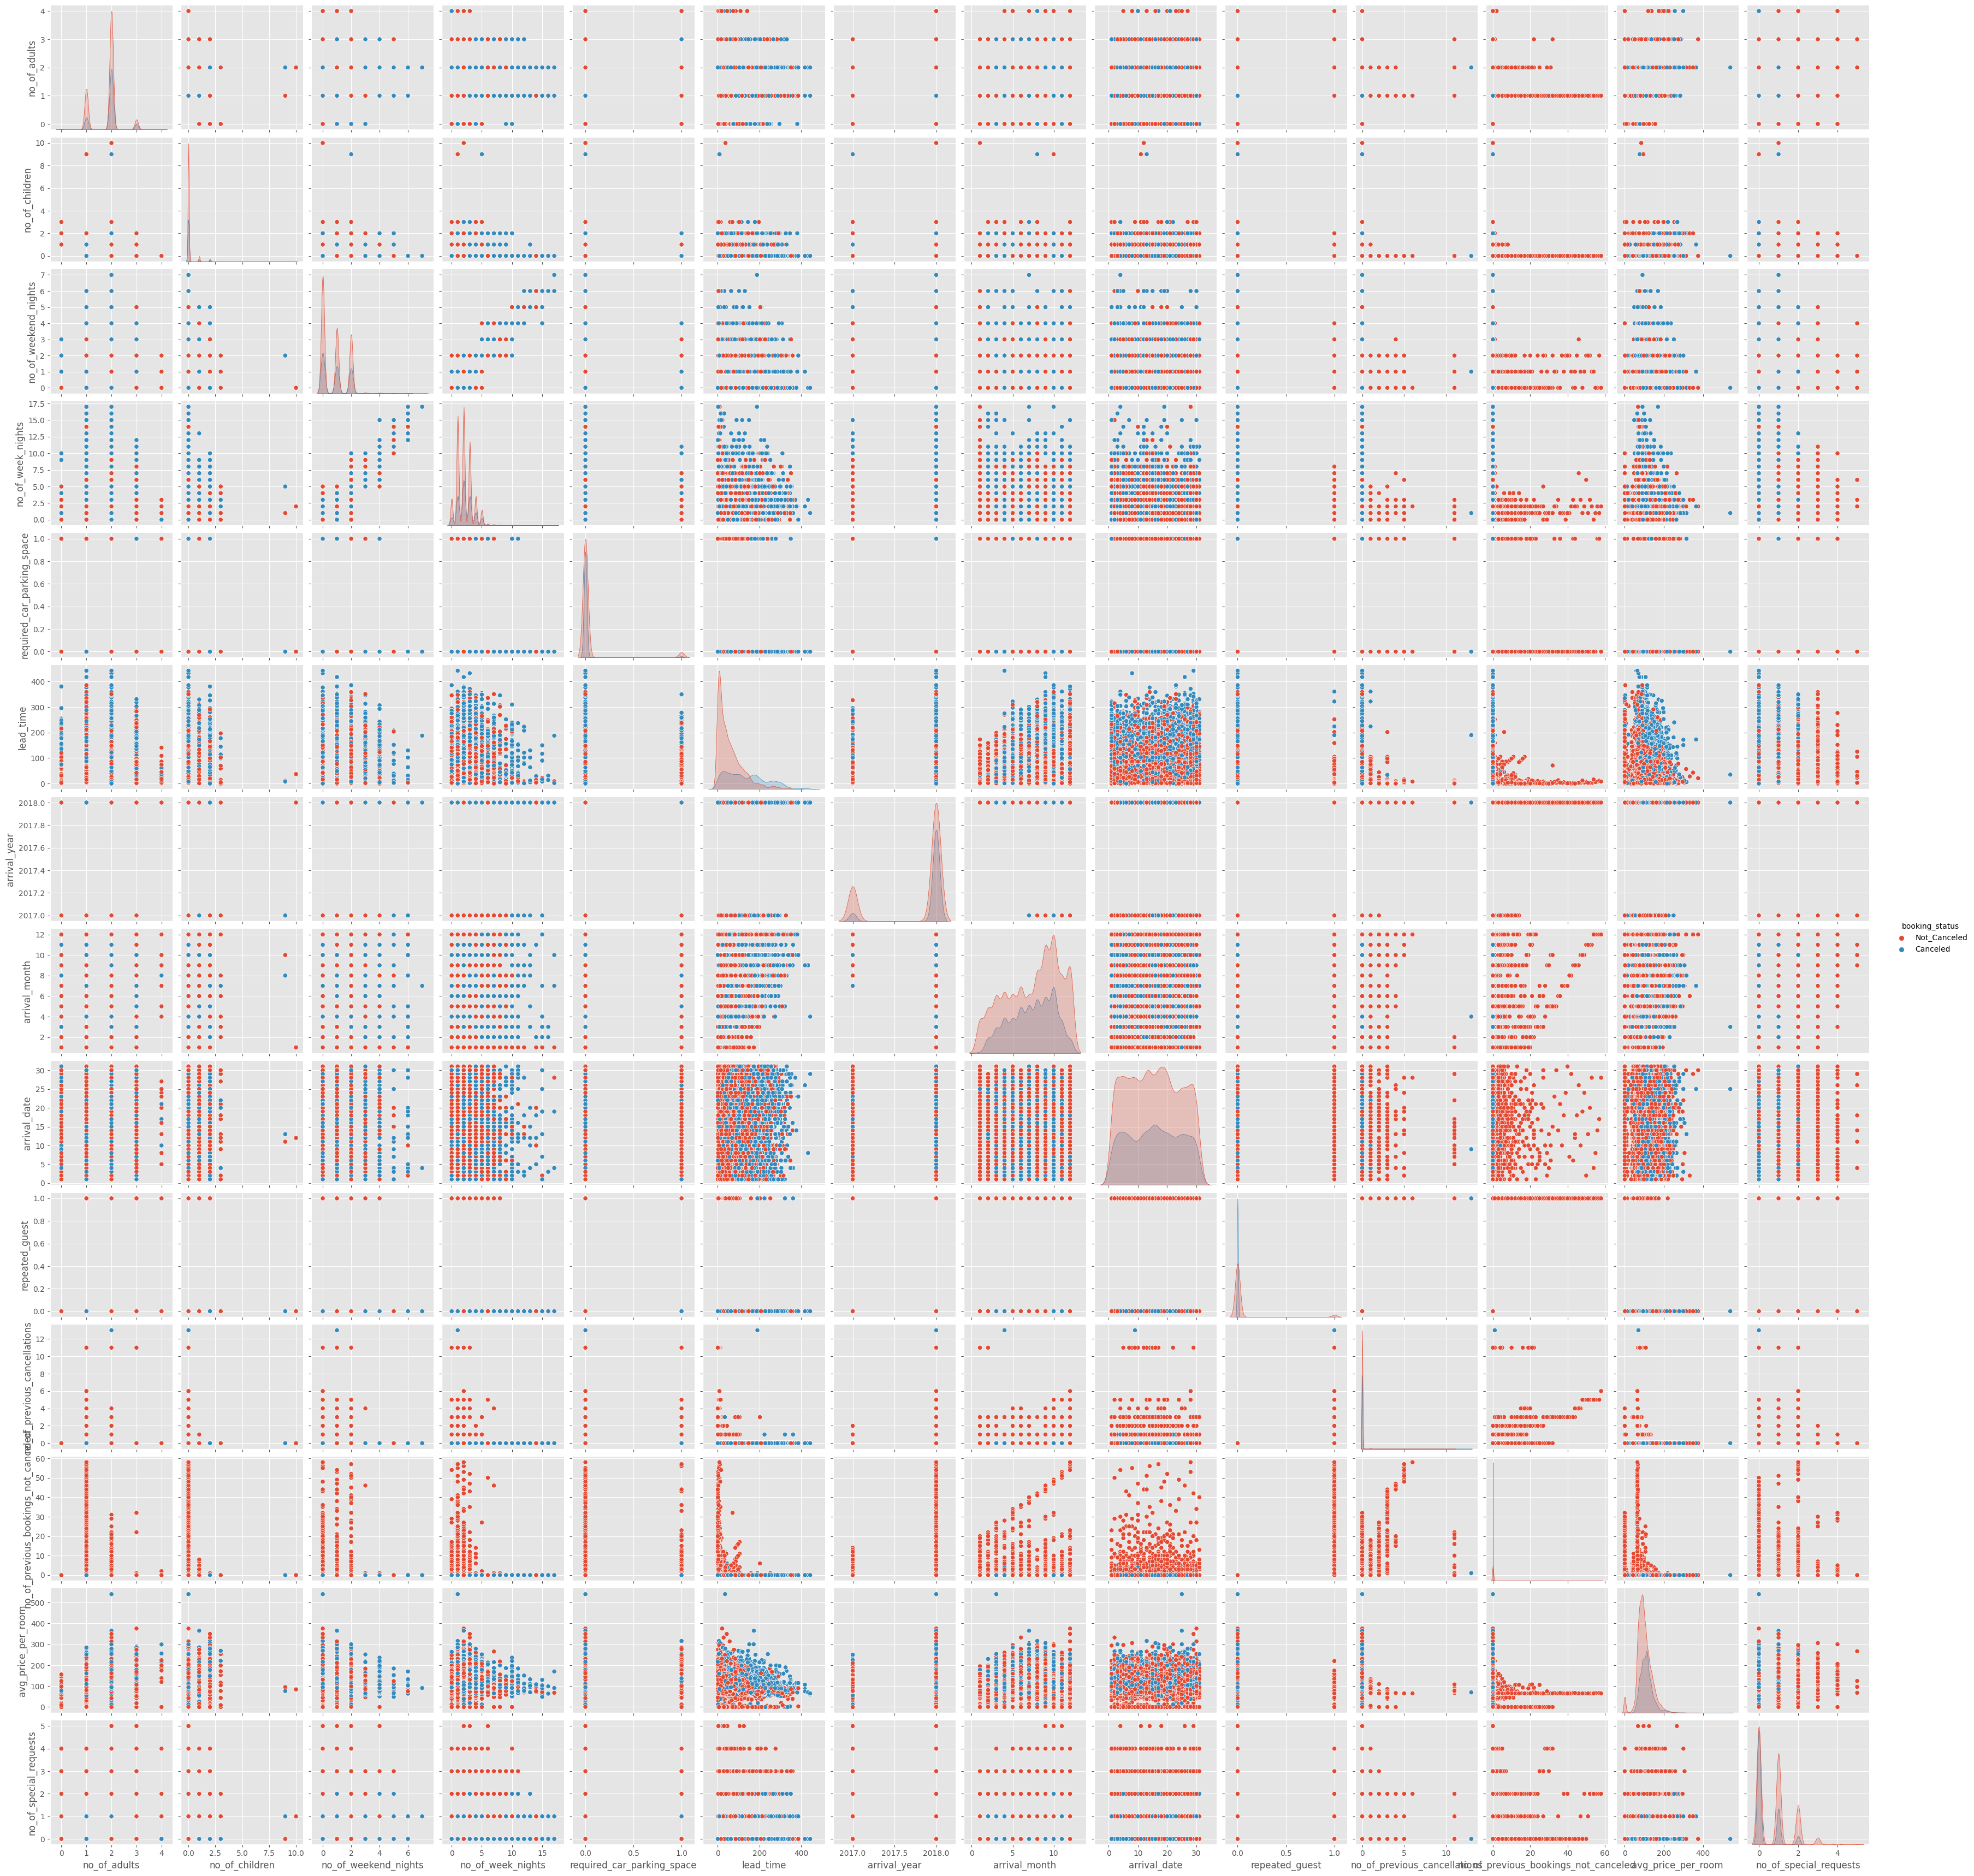

In [ ]:
#creating a pairplot of the data to anlayse how each feature affects the other
sns.pairplot(data_df, hue = "booking_status")

<Axes: >

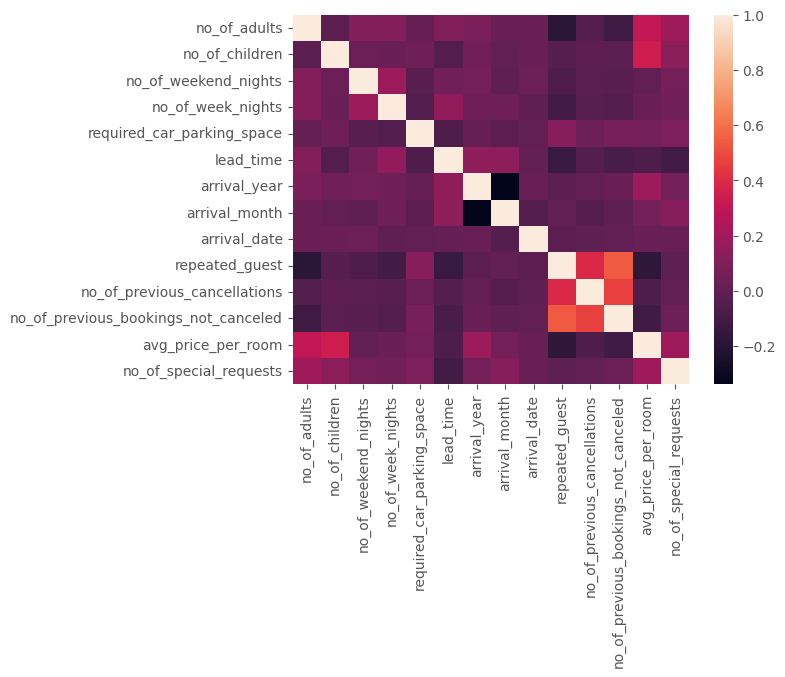

In [ ]:
#creating a heatmap of all the features of the data
sns.heatmap(data_df.corr())

# **Data Preprocessing**

In [ ]:
#dropping column 'Booking_ID' as it has too many unique values
data_df = data_df.drop('Booking_ID', axis=1)

In [ ]:
#allocating the column names as per data_type for easier manipulation of data
number_col = [i for i in data_df.columns if data_df[i].dtype != 'object']
object_col = [i for i in data_df.columns if data_df[i].dtype == 'object']

#removing columns arrival_year, arrival_month and arrival_date as they are not required for outlier detection
cols = ['arrival_year','arrival_month','arrival_date']
for i in cols:
  number_col.remove(i)

#removing booking_status as it is no required for outlier detection
object_col.remove('booking_status')

Removing Outliers

In [ ]:
#finding and removing outliers from the data

for i in number_col:
  q1 = data_df[i].quantile(0.25)
  q3 = data_df[i].quantile(0.75)
  iqr = q3 - q1

#finding the upper and lower limits

  u_lim = q3 + 1.5 * iqr
  l_lim = q1 - 1.5 * iqr

#removing the outliers

  train_new = data_df[data_df[i] < u_lim]
  train_new = data_df[data_df[i] > l_lim]

In [ ]:
#checking the shape after removing outliers
train_new.shape

(36275, 18)

In [ ]:
#dividing the data into train and target
train_data_df, target = train_new.iloc[:,:-1], train_new.iloc[:, -1]
print(train_data_df)
print(target)

       no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0                 2               0                     1                  2   
1                 2               0                     2                  3   
2                 1               0                     2                  1   
3                 2               0                     0                  2   
4                 2               0                     1                  1   
...             ...             ...                   ...                ...   
36270             3               0                     2                  6   
36271             2               0                     1                  3   
36272             2               0                     2                  6   
36273             2               0                     0                  3   
36274             2               0                     1                  2   

      type_of_meal_plan  required_car_p

In [ ]:
#checking the columns in train_data_df after dividing data
train_data_df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [ ]:
#checking the shape after dividing data
train_data_df.shape

(36275, 17)

Categorical Encoding

In [ ]:
#encoding the booking_status into binary values of 0 and 1
target = target.replace({'Canceled':1, 'Not_Canceled':0})
target

0        0
1        0
2        1
3        1
4        1
        ..
36270    0
36271    1
36272    0
36273    1
36274    0
Name: booking_status, Length: 36275, dtype: int64

In [ ]:
#creating a list of column names to be encoded where data_type is object
transform_list = [('encode', OneHotEncoder(dtype ='int', drop=None), object_col)]

#assigning variable to ColumnTransformer
col_transform = ColumnTransformer(transform_list, remainder = 'passthrough')

#one hot encoding the non numerical data in train_data_df
transformed = col_transform.fit_transform(train_data_df)

#saving the encoded columns into a Dataframe
encoded_train = pd.DataFrame(transformed, columns = col_transform.get_feature_names_out())

encoded_train.head()
encoded_train.shape
print(encoded_train)

       encode__type_of_meal_plan_Meal Plan 1  \
0                                        1.0   
1                                        0.0   
2                                        1.0   
3                                        1.0   
4                                        0.0   
...                                      ...   
36270                                    1.0   
36271                                    1.0   
36272                                    1.0   
36273                                    0.0   
36274                                    1.0   

       encode__type_of_meal_plan_Meal Plan 2  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   
...                                      ...   
36270                                    0.0   
36271                                  

In [ ]:
transform_list

[('encode',
  OneHotEncoder(dtype='int'),
  ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'])]

In [ ]:
#mapping the encoded column series to train_data_df
train_data_df = pd.concat([train_data_df, encoded_train], axis = 'columns')

#dropping the non encoded columns with data type Object
train_data_df.drop(object_col, axis =1, inplace = True)
train_data_df.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

   required_car_parking_space  lead_time  arrival_year  arrival_month  \
0                           0        224          2017             10   
1                           0          5          2018             11   
2                           0          1          2018              2   
3                           0        211          2018              5   
4                           0         48          2018              4   

   arrival_date  repeated_guest  ...  remainder__required_car_parking_space  \
0             2               0  ...                                    0.0   
1             6               0  ...                                    0.0   
2            28               0  ...                                    0.0   
3            20               0  ...                                    0.0   
4            11               0  ...                                    0.0   

   remainder__lead_time  remainder__arrival_year  remainder__arrival_month  \
0                 224.0                   2017.0                      10.0   
1                   5.0                   2018.0                      11.0   
2                   1.0                   2018.0                       2.0   
3                 211.0                   2018.0                       5.0   
4                  48.0                   2018.0                       4.0   

   remainder__arrival_date  remainder__repeated_guest  \
0                      2.0                        0.0   
1                      6.0                        0.0   
2                     28.0                        0.0   
3                     20.0                        0.0   
4                     11.0                        0.0   

   remainder__no_of_previous_cancellations  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   remainder__no_of_previous_bookings_not_canceled  \
0                                              0.0   
1                                              0.0   
2                                              0.0   
3                                              0.0   
4                                              0.0   

   remainder__avg_price_per_room  remainder__no_of_special_requests  
0                          65.00                                0.0  
1                         106.68                                1.0  
2                          60.00                                0.0  
3                         100.00                                0.0  
4                          94.50                                0.0  

[5 rows x 44 columns]

In [ ]:
#checking the shape of the data after encoding
train_data_df.shape

(36275, 44)

In [ ]:
#splitting the data into train, test and validation

X_train, X_test, y_train, y_test = train_test_split(train_data_df, target, random_state = 42, test_size =0.1)

# **Training Models and their Results**

In [ ]:
#creating a function to run multiple models

def classification(name, class_model, X_train, y_train, X_test, y_test, data):

#fitting the model on X_train and y_train data
  class_model.fit(X_train, y_train)

#storing the predicted class data onto y_pred
  y_pred = class_model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  report = classification_report(y_test, y_pred, output_dict=True)
  roc = roc_auc_score(y_test,y_pred)

#printing the model name, Accuracy score, Classification report, ROC curve and confusion matrix
  print("model: ", name)
  print("Accuracy: ", accuracy)
  print("Classification report: ", classification_report(y_test, y_pred))
  print("ROC_curve: ", roc)
  
  # creating a confusion matrix
  fig, ax = plt.subplots(figsize=(4, 4))
  sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g', ax=ax)
  ax.set_title('Confusion Matrix ('+ name +')')
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')

  # Save prediction as a numpy array, and convert to pandas DataFrame

  test_idx = X_test.index
  output_data = np.stack((np.array(data.loc[test_idx, 'Booking_ID']),y_test, y_pred), axis=1)
  output_df = pd.DataFrame(data=output_data, columns = ['Booking_ID', 'Actual_Booking_type', 'Predicted_Booking_type'])

  display(output_df)

# Saving DataFrame as a csv

  output_df.to_csv('predicted_data_'+ str(name) + '.csv', index=False)

  precision = report['weighted avg']['precision']
  recall = report['weighted avg']['recall']
  f1_score = report['weighted avg']['f1-score']
  support = report['weighted avg']['support']


#returning a dictionary of the results that we want to put in a table to class_result
  return {
        'Classifier': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1_score,
        'Support': support
    }




In [ ]:
#storing the classifiers onto a list

classifiers = {"Logistic Regression" :LogisticRegression(),
               "Decision Tree": DecisionTreeClassifier(),
               "XGBoost": GradientBoostingClassifier(),
               "K Nearest Neighbor": KNeighborsClassifier(),
               "Random Forest": RandomForestClassifier()
}


model:  Logistic Regression
Accuracy:  0.7877618522601985
Classification report:                precision    recall  f1-score   support

           0       0.80      0.90      0.85      2400
           1       0.74      0.57      0.65      1228

    accuracy                           0.79      3628
   macro avg       0.77      0.74      0.75      3628
weighted avg       0.78      0.79      0.78      3628

ROC_curve:  0.735394951140065


Booking_ID Actual_Booking_type Predicted_Booking_type
0      INN04969                   0                      0
1      INN34541                   0                      0
2      INN36109                   0                      0
3      INN01554                   1                      0
4      INN24975                   0                      0
...         ...                 ...                    ...
3623   INN29523                   0                      0
3624   INN25061                   0                      0
3625   INN08475                   1                      0
3626   INN13558                   0                      0
3627   INN00626                   0                      0

[3628 rows x 3 columns]

model:  Decision Tree
Accuracy:  0.8751378169790518
Classification report:                precision    recall  f1-score   support

           0       0.90      0.91      0.91      2400
           1       0.82      0.81      0.81      1228

    accuracy                           0.88      3628
   macro avg       0.86      0.86      0.86      3628
weighted avg       0.87      0.88      0.87      3628

ROC_curve:  0.8585016286644951


Booking_ID Actual_Booking_type Predicted_Booking_type
0      INN04969                   0                      0
1      INN34541                   0                      0
2      INN36109                   0                      0
3      INN01554                   1                      1
4      INN24975                   0                      0
...         ...                 ...                    ...
3623   INN29523                   0                      0
3624   INN25061                   0                      0
3625   INN08475                   1                      1
3626   INN13558                   0                      0
3627   INN00626                   0                      0

[3628 rows x 3 columns]

model:  XGBoost
Accuracy:  0.8442668136714443
Classification report:                precision    recall  f1-score   support

           0       0.85      0.93      0.89      2400
           1       0.83      0.68      0.75      1228

    accuracy                           0.84      3628
   macro avg       0.84      0.80      0.82      3628
weighted avg       0.84      0.84      0.84      3628

ROC_curve:  0.8049457111834962


Booking_ID Actual_Booking_type Predicted_Booking_type
0      INN04969                   0                      0
1      INN34541                   0                      0
2      INN36109                   0                      0
3      INN01554                   1                      1
4      INN24975                   0                      0
...         ...                 ...                    ...
3623   INN29523                   0                      0
3624   INN25061                   0                      0
3625   INN08475                   1                      1
3626   INN13558                   0                      0
3627   INN00626                   0                      0

[3628 rows x 3 columns]

model:  K Nearest Neighbor
Accuracy:  0.8098125689084895
Classification report:                precision    recall  f1-score   support

           0       0.82      0.91      0.86      2400
           1       0.77      0.62      0.69      1228

    accuracy                           0.81      3628
   macro avg       0.80      0.76      0.78      3628
weighted avg       0.81      0.81      0.80      3628

ROC_curve:  0.7637927524429968


Booking_ID Actual_Booking_type Predicted_Booking_type
0      INN04969                   0                      0
1      INN34541                   0                      0
2      INN36109                   0                      0
3      INN01554                   1                      1
4      INN24975                   0                      0
...         ...                 ...                    ...
3623   INN29523                   0                      0
3624   INN25061                   0                      0
3625   INN08475                   1                      1
3626   INN13558                   0                      0
3627   INN00626                   0                      0

[3628 rows x 3 columns]

model:  Random Forest
Accuracy:  0.9032524807056229
Classification report:                precision    recall  f1-score   support

           0       0.91      0.95      0.93      2400
           1       0.89      0.81      0.85      1228

    accuracy                           0.90      3628
   macro avg       0.90      0.88      0.89      3628
weighted avg       0.90      0.90      0.90      3628

ROC_curve:  0.8811434581976113


Booking_ID Actual_Booking_type Predicted_Booking_type
0      INN04969                   0                      0
1      INN34541                   0                      0
2      INN36109                   0                      0
3      INN01554                   1                      1
4      INN24975                   0                      0
...         ...                 ...                    ...
3623   INN29523                   0                      0
3624   INN25061                   0                      0
3625   INN08475                   1                      1
3626   INN13558                   0                      0
3627   INN00626                   0                      0

[3628 rows x 3 columns]

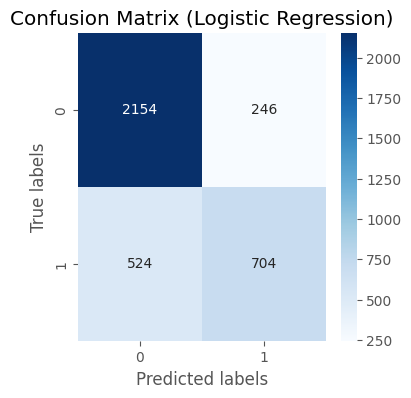

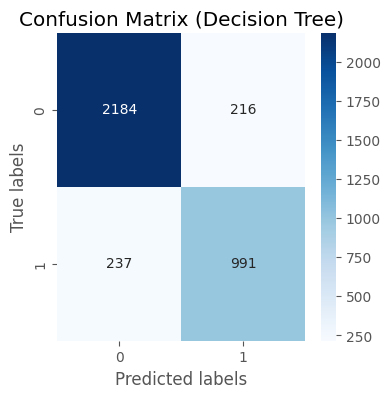

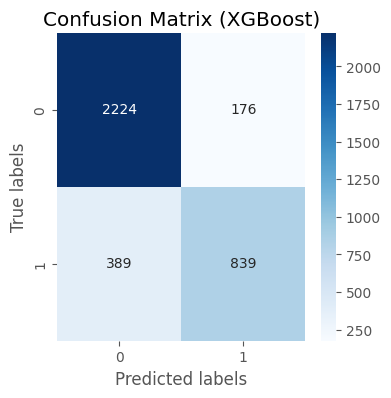

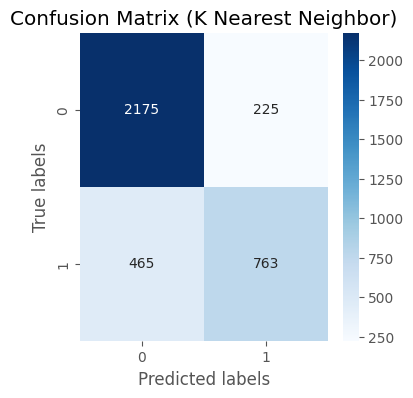

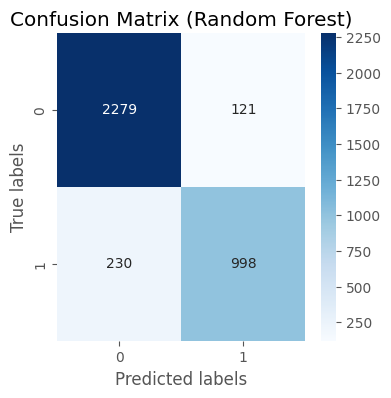

In [ ]:

# Creating an empty results table
results_table = pd.DataFrame(columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1-score', 'Support'])

#calling the classifier function for each classifier using a for loop
for name,class_mod in classifiers.items():
   results_table = results_table.append(classification(name, class_mod, X_train, y_train, X_test, y_test, data), ignore_index=True)

# Saving the result table to a CSV file
results_table.to_csv('results_table.csv', index=False)